In [28]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


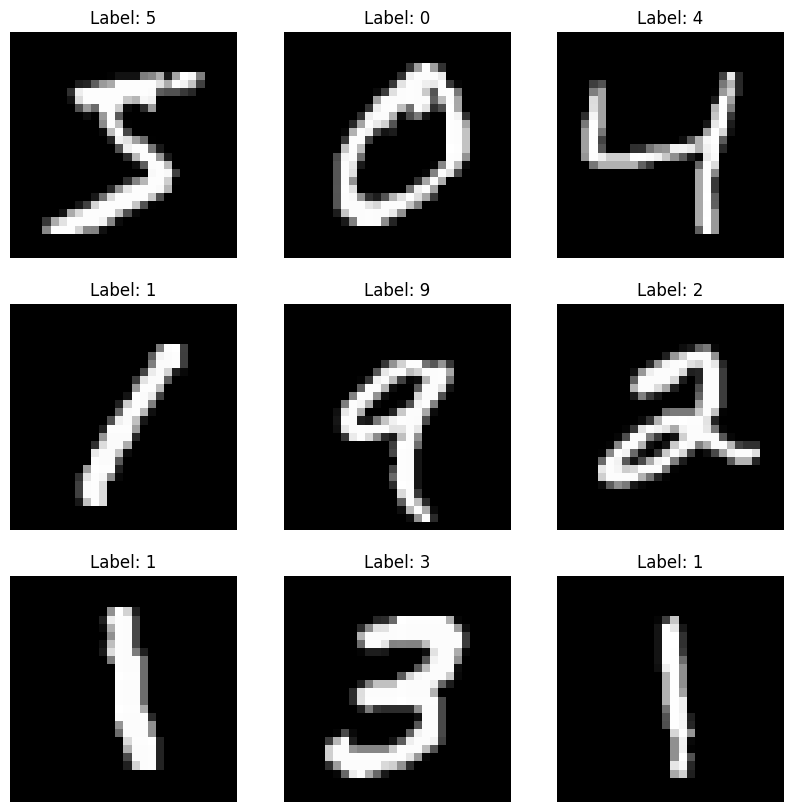

In [29]:
import matplotlib.pyplot as plt

# Plot first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [30]:
from tensorflow.keras.utils import to_categorical

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
# Build the model
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

model.save('mnist_model.h5')

Epoch 1/30
375/375 [==============================] - 9s 18ms/step - loss: 4.4094 - accuracy: 0.8706 - val_loss: 1.4691 - val_accuracy: 0.8572 - lr: 0.0010
Epoch 2/30
375/375 [==============================] - 6s 17ms/step - loss: 0.8272 - accuracy: 0.9256 - val_loss: 0.6430 - val_accuracy: 0.9296 - lr: 0.0010
Epoch 3/30
375/375 [==============================] - 6s 17ms/step - loss: 0.6267 - accuracy: 0.9264 - val_loss: 0.5574 - val_accuracy: 0.9382 - lr: 0.0010
Epoch 4/30
375/375 [==============================] - 6s 17ms/step - loss: 0.5725 - accuracy: 0.9304 - val_loss: 0.5302 - val_accuracy: 0.9370 - lr: 0.0010
Epoch 5/30
375/375 [==============================] - 7s 17ms/step - loss: 0.5355 - accuracy: 0.9335 - val_loss: 0.4847 - val_accuracy: 0.9424 - lr: 0.0010
Epoch 6/30
375/375 [==============================] - 6s 17ms/step - loss: 0.5217 - accuracy: 0.9345 - val_loss: 0.4828 - val_accuracy: 0.9419 - lr: 0.0010
Epoch 7/30
375/375 [==============================] - 6s 16ms/st

1/1 [==============================] - 0s 34ms/step
Predicted Label: 9


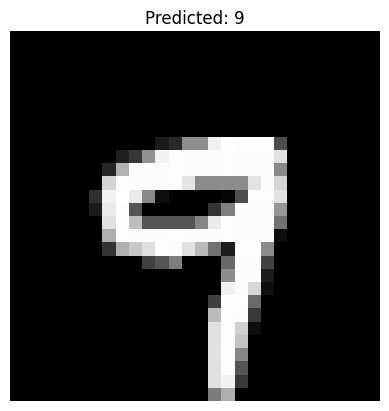

In [40]:
import numpy as np
test_ind=906
prediction = model.predict(x_test[test_ind].reshape(1, 784))
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")
plt.imshow(x_test[test_ind].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

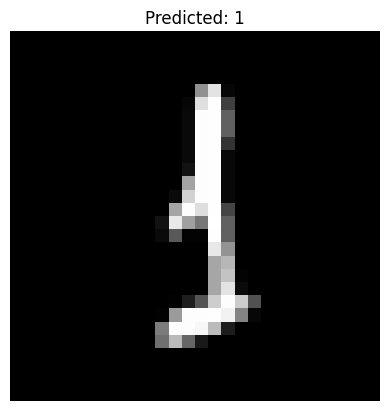

In [ ]:
model.save('mnist_model.h5')  
from tensorflow.keras.models import load_model
model = load_model('mnist_model.h5')
